# Adesso adaptado no Colab

## Vídeos antigos
* [Adesso1-mm-1-7 (86min)](https://www.loom.com/share/92fbb710f02646c59d45c4e8fcfbc469) após 1h17m

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2, requests, sys
import numpy as np

In [ ]:
# download _morph.py from drive
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1FlMtAkb0npwmD54aCysLsxB84PehcKMe

In [ ]:
from _morph import *
help(mm.gdist)

Help on function gdist in module _morph:

gdist(f, g, b=array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8))
    This function will be calculate geodesic distance with erode neg of g intersect f
    input:
      - f: input binary image with 0 and 1
      - g: marker - input binary image with 0 and 1
      - b: kernel
    output:
      - y: image with op



# mmgdist

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 
1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 
1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 
1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 
1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 
1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 
1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 
1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 
1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 
1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 
1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 
1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 
1 1 0 

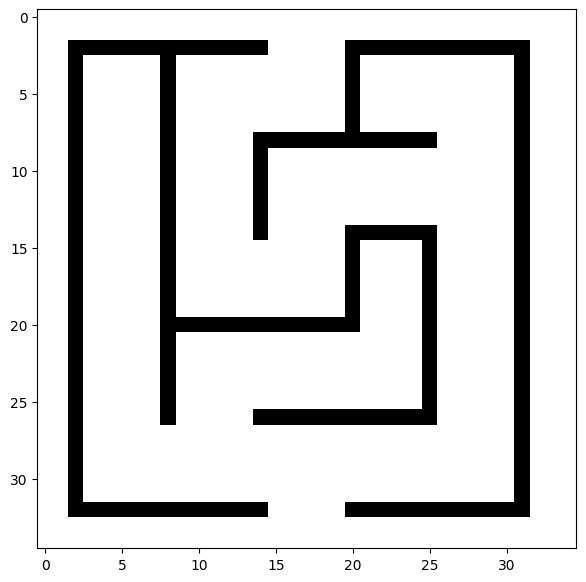

In [ ]:
img = mm.read('https://drive.google.com/file/d/1jRzJ6he1sFc-AH7tGRXWYqxbASu3CUdy/view?usp=sharing')
img = cv2.resize(img,(35,35))
img = img[:,:,:3]
img1 = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY) # converte para grayscale
f0 = (mm.threshold(img1)/255).astype('uint16')
plt.figure(figsize=(7, 7))
mm.show(f0)
print(mm.drawImage(f0))

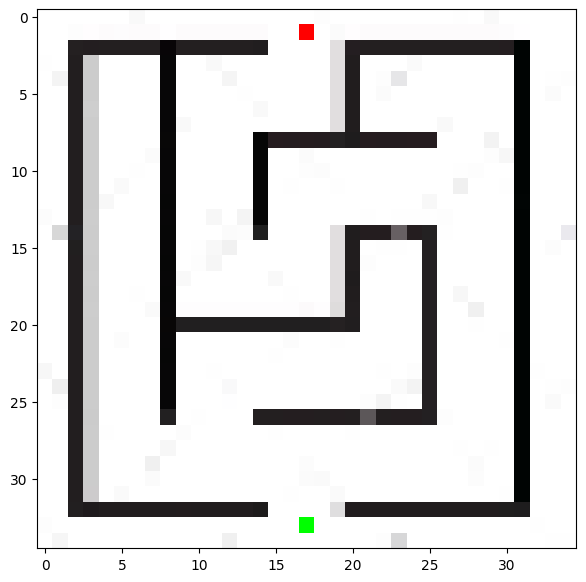

In [ ]:
f = (f0/255).astype('uint16')
m0 = np.zeros_like(f).astype('uint8')
m1 = np.zeros_like(f).astype('uint8')
m0[1,17] = 1
m1[-2,17] = 1
plt.figure(figsize=(7, 7))
mm.show(img,m0,m1)

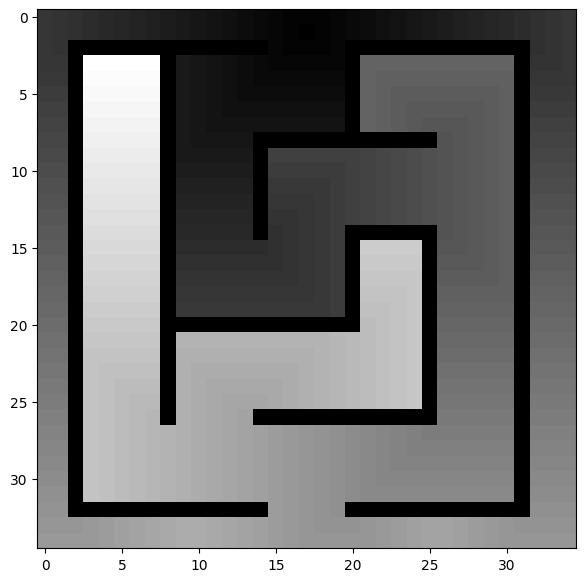

In [ ]:
d0 = mm.gdist(f0,m0)
plt.figure(figsize=(7, 7))
mm.show(d0)

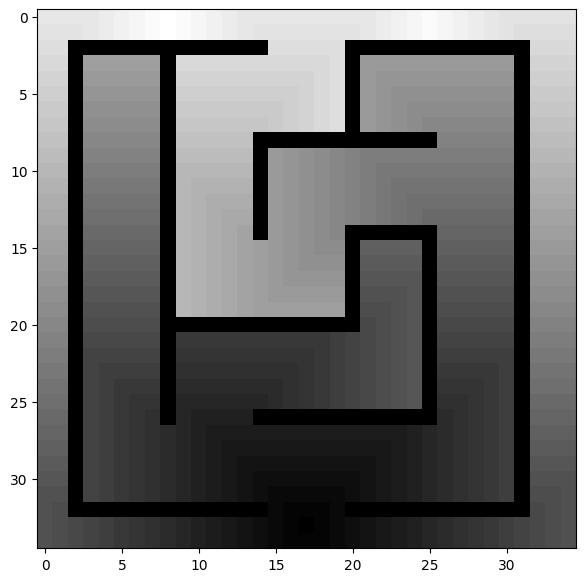

In [ ]:
d1 = mm.gdist(f0,m1)
plt.figure(figsize=(7, 7))
mm.show(d1)

47


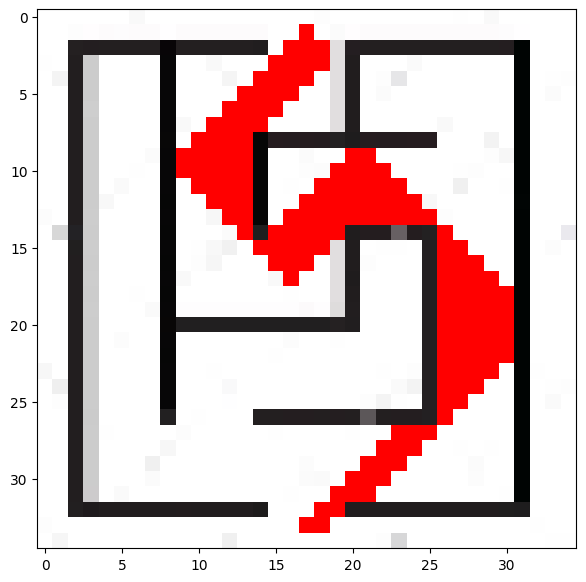

In [ ]:
d = d0+d1
min = np.amin(d[d != np.amin(d)]) # segundo mínimo
print(min)
plt.figure(figsize=(7, 7))
mm.show(img,d==min)

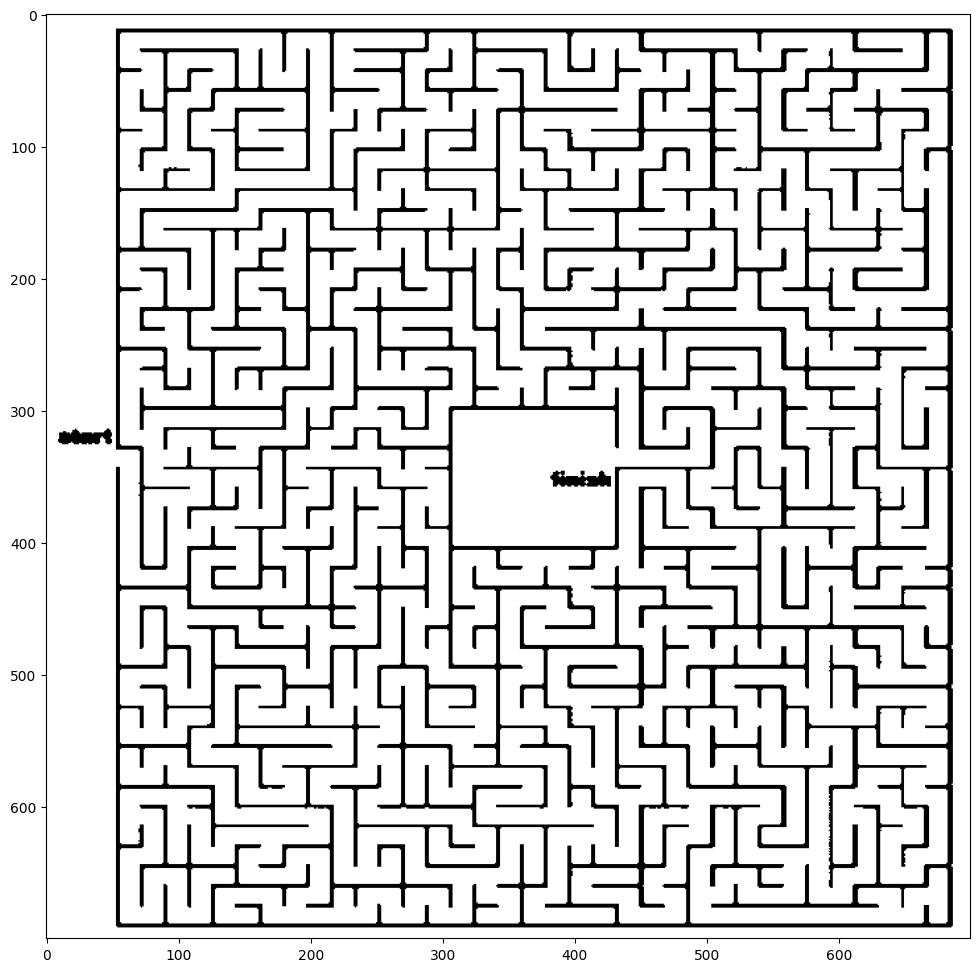

In [ ]:
img = mm.read('https://drive.google.com/file/d/1Kta1-OXEvqOxAqV_y-qRP2ZL4q2n8Snn/view?usp=sharing')
img = mm.ero(img,mm.sebox())
img = cv2.resize(img,(700,700))
img = img[:,:,:3]
img1 = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY) # converte para grayscale
f0 = (mm.threshold(img1)/255).astype('uint16')
f0 = mm.open(f0,mm.secross())
plt.figure(figsize=(12, 12))
mm.show(f0)

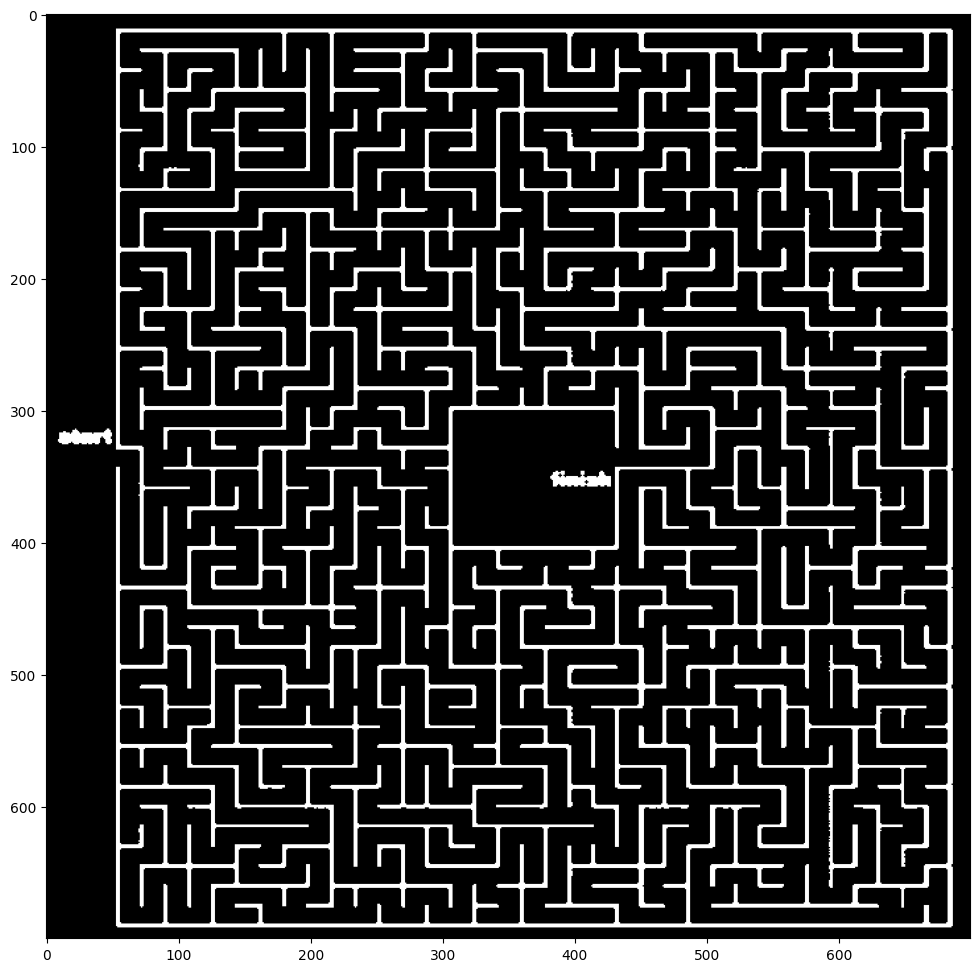

In [ ]:
plt.figure(figsize=(12, 12))
mm.show(mm.neg(f0))

In [ ]:
f1 = (mm.neg(f0)/255).astype('uint8')
f2 = mm.label(f1)
np.amax(f2)

3

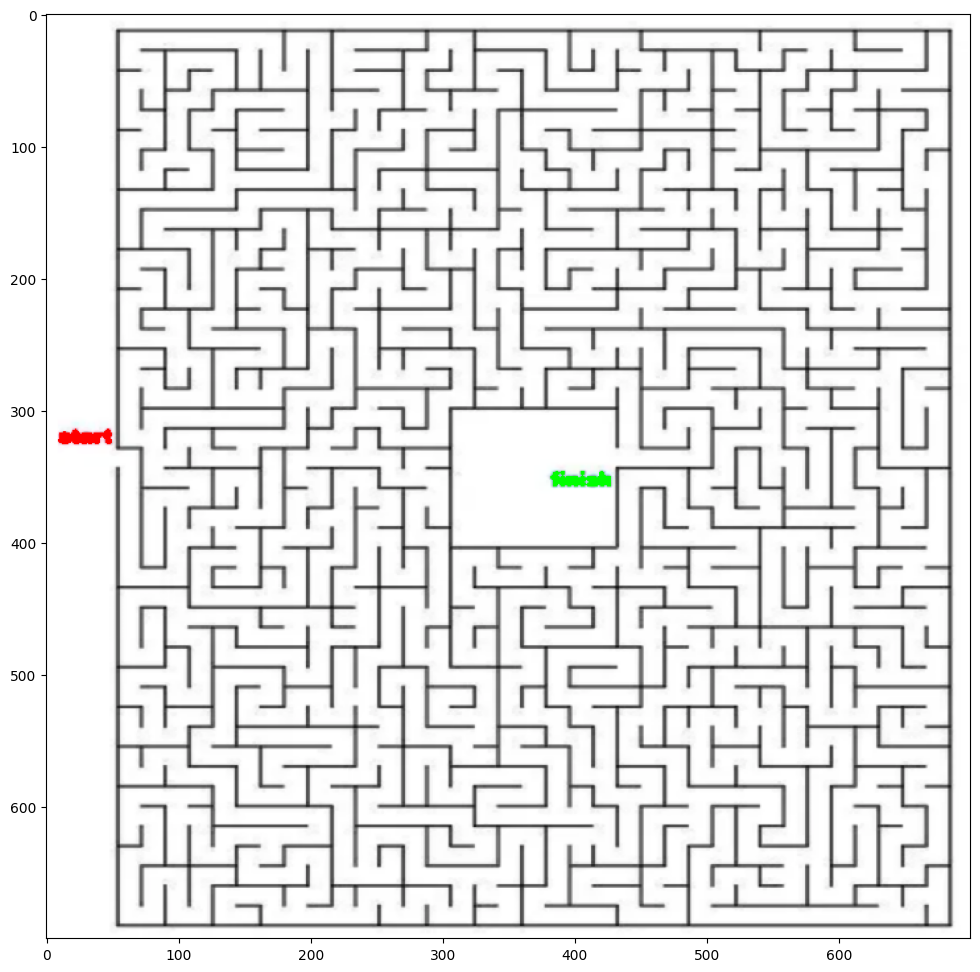

In [ ]:
m0 = np.array(f2==2).astype('uint8')
m1 = np.array(f2==3).astype('uint8')
plt.figure(figsize=(12, 12))
mm.show(img,m0,m1)

In [ ]:
#d0 = mm.gdist(f0,m0)
#plt.figure(figsize=(15, 15))
#np.amax(m1)
#mm.show(f0)

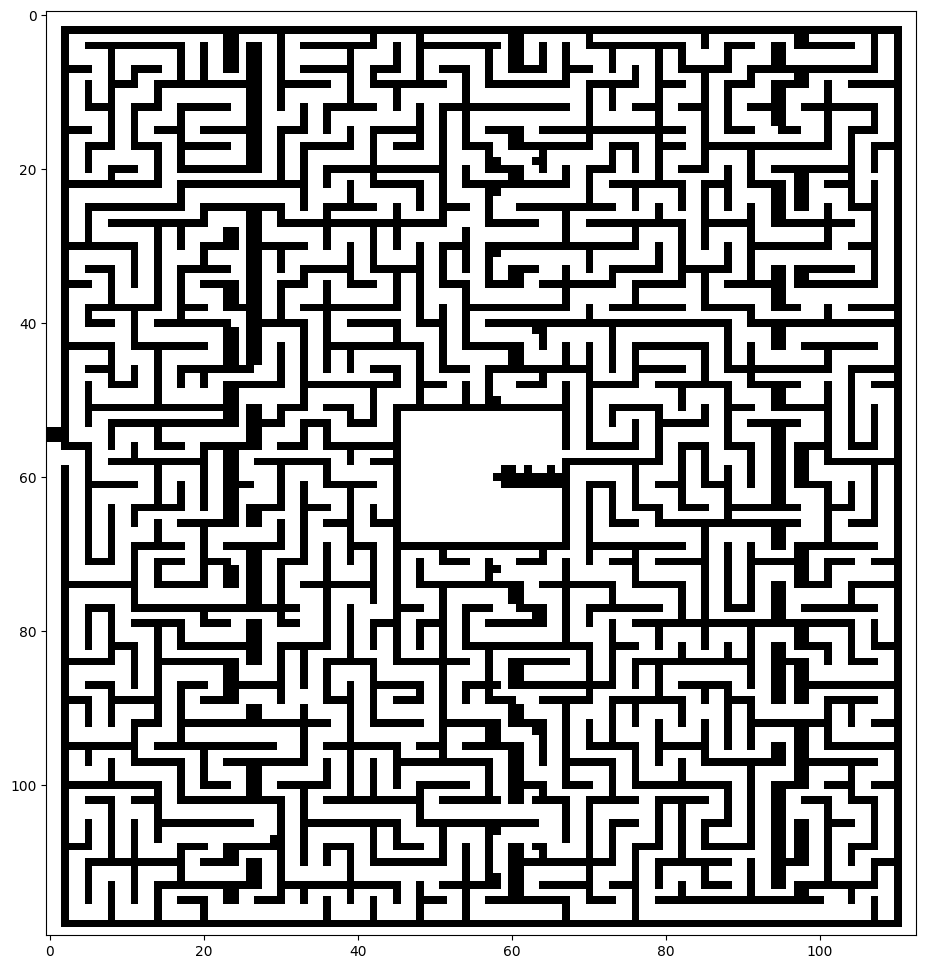

In [ ]:
img = mm.read('https://drive.google.com/file/d/1Kta1-OXEvqOxAqV_y-qRP2ZL4q2n8Snn/view?usp=sharing')
img = mm.ero(img,mm.sebox(3))
img = cv2.resize(img,(120,120))
img = img[:,7:,:3]
img1 = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY) # converte para grayscale
f0 = (mm.threshold(img1)/255).astype('uint16')
plt.figure(figsize=(12, 12))
mm.show(f0)

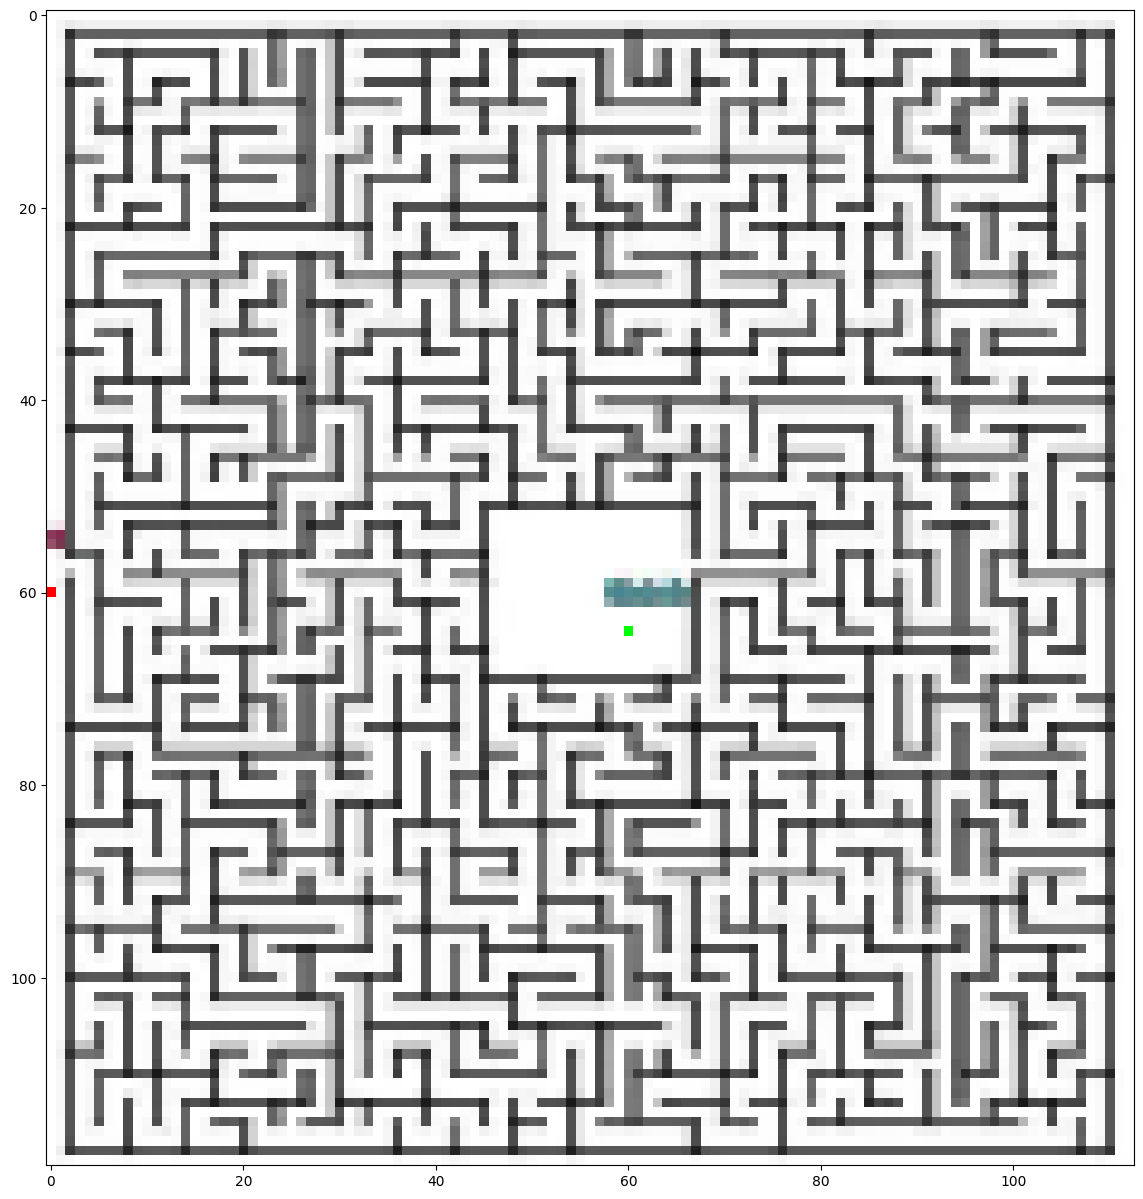

In [ ]:
m0 = np.zeros_like(f0).astype('uint8')
m1 = np.zeros_like(f0).astype('uint8')
m0[60,0] = 1
m1[64,60] = 1
plt.figure(figsize=(15, 15))
mm.show(img,m0,m1)

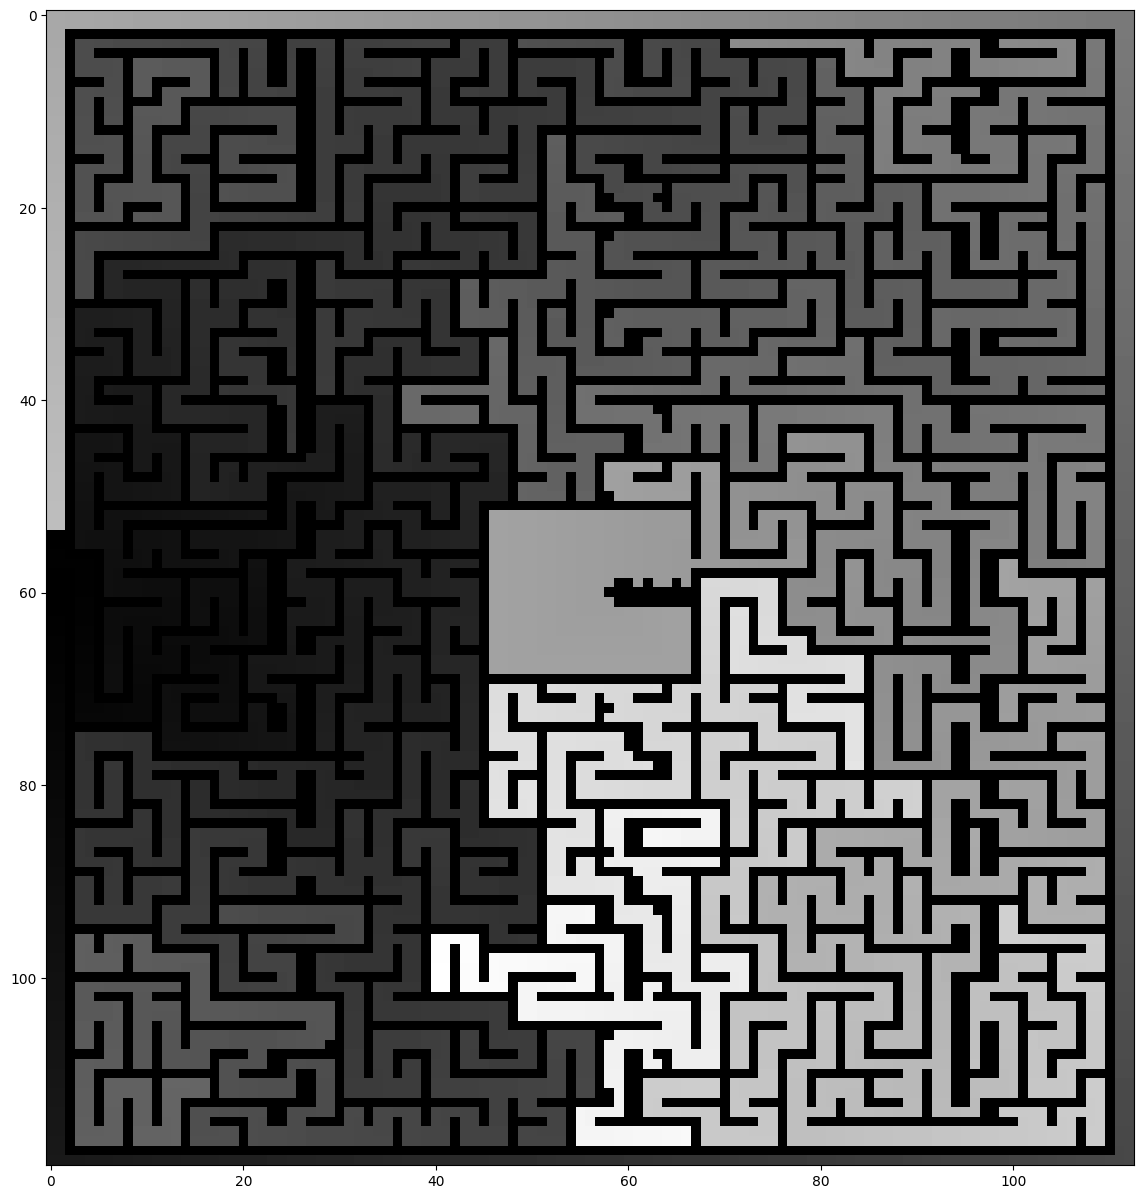

In [ ]:
d0 = mm.gdist(f0,m0)
plt.figure(figsize=(15, 15))
mm.show(d0)

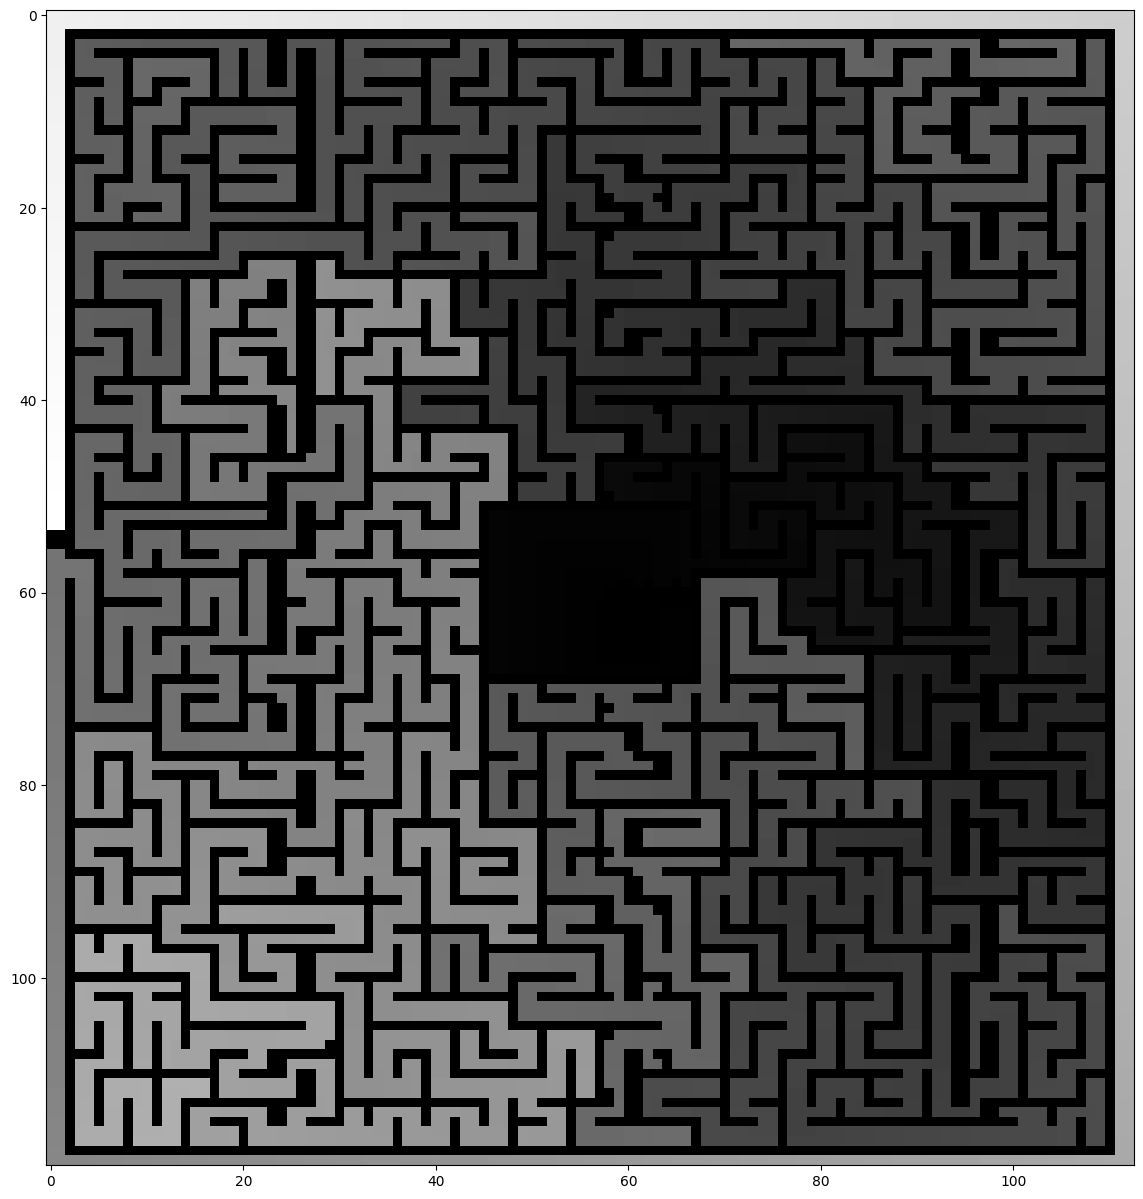

In [ ]:
d1 = mm.gdist(f0,m1)
plt.figure(figsize=(15, 15))
mm.show(d1)

374


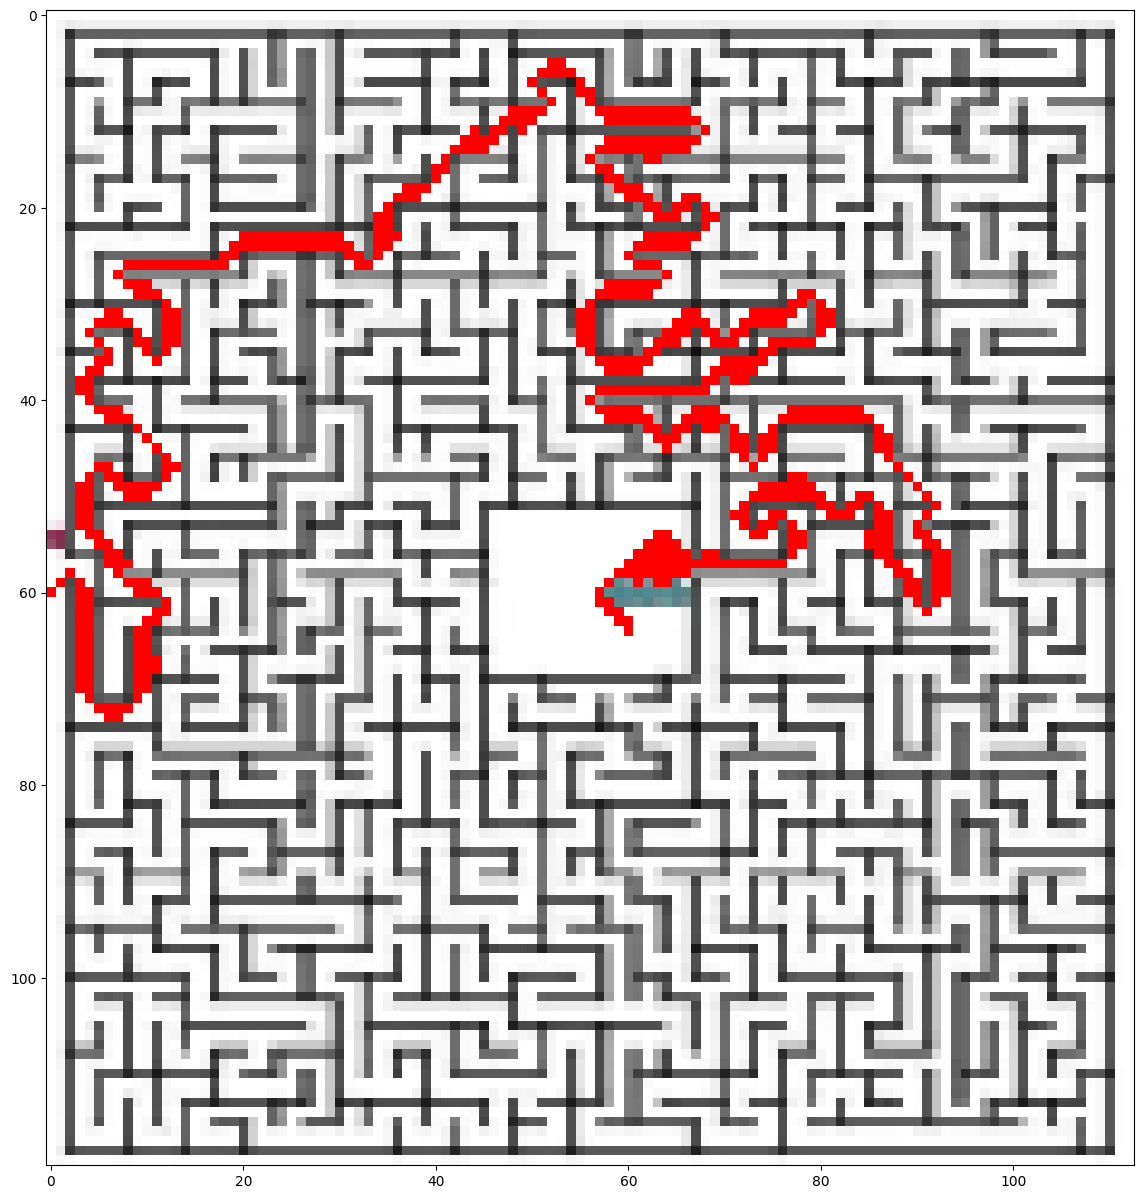

In [ ]:
d = d0+d1
min = np.amin(d[d != np.amin(d)]) # segundo mínimo
print(min)
plt.figure(figsize=(15, 15))
mm.show(img,d==min)